In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df= pd.read_csv('/content/winequality-red.csv')

In [3]:
df.shape

(1599, 12)

In [4]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   11                    34   0.9978  3.51       0.56   
1                   25                    67   0.9968  3.20       0.68   
2                   15                    54   0.9970  3.26       0.65   
3                   17                    60   0.9980  3.16       0.58   
4                   11                    34   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
#checking for missing value
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
#statistical values
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.875547             46.468418     0.996747   
std       0.047065            10.460434             32.895920     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

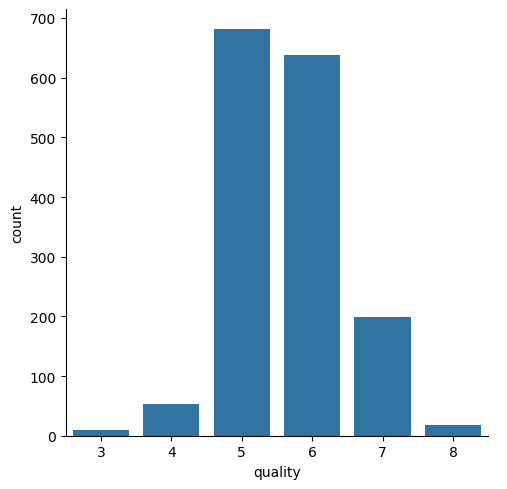

In [7]:
#number of values for each quality
sns.catplot(x='quality', data=df, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

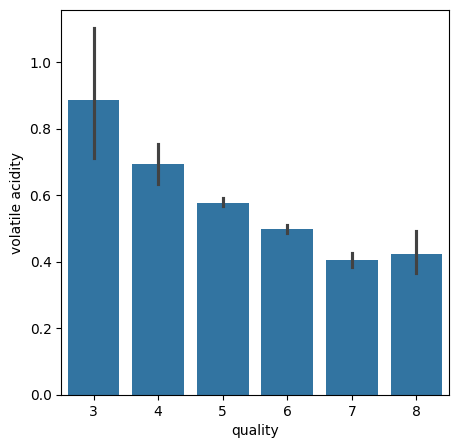

In [8]:
#volatile acidity vs quality
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=df)

<Axes: xlabel='quality', ylabel='fixed acidity'>

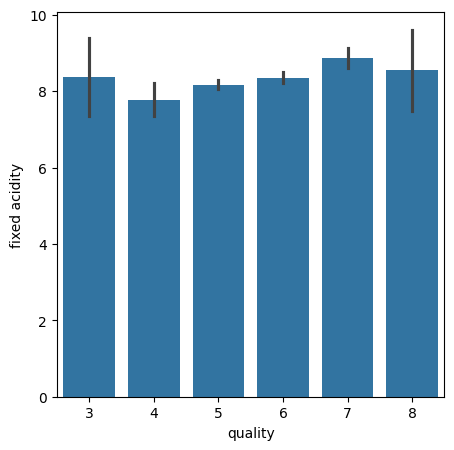

In [9]:
#fixed acidity vs quality
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='fixed acidity', data=df)

<Axes: xlabel='quality', ylabel='citric acid'>

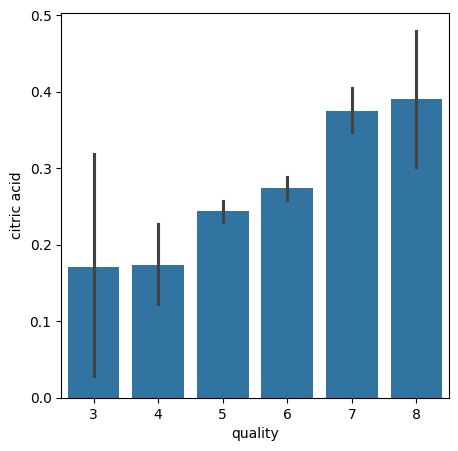

In [10]:
#citric acid vs quality
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=df)

In [11]:
cor= df.corr()

<Axes: >

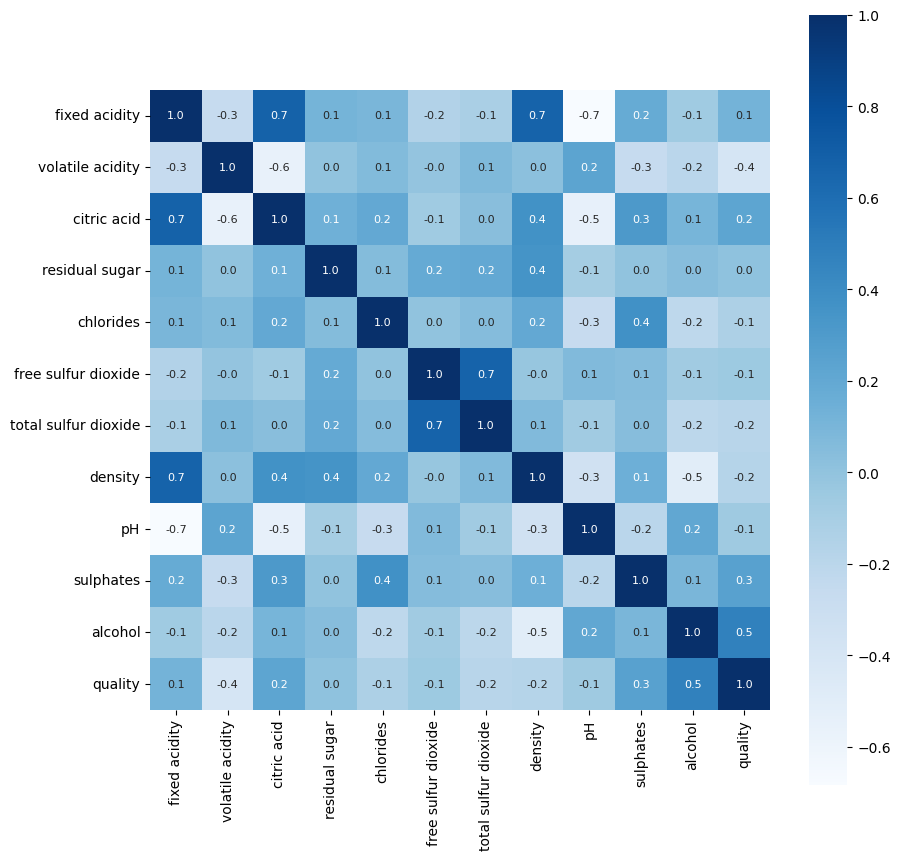

In [12]:
#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cor, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

In [13]:
#seperate the data and label
df1= df.drop('quality', axis=1)

In [14]:
df1

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                      11                    34  0.99780  3.51       0.56   
1                      25                    67  0.99680  3.20       0.68   
2                      15                    54  0.99700  3.26       0.65   
3                      17                    60  0.99800  3.16       0.58   
4                      11                    34  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                   32                    44  0.99490  3.45       0.58   
1595                   39                    51  0.99512  3.52       0.76   
1596                   29                    40  0.99574  3.42       0.75   
1597                   32                    44  0.99547  3.57       0.71   
1598                   18                    42  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1599 rows x 11 columns]

In [15]:
df2= df['quality'].apply(lambda y_value: 1 if y_value>=6 else 0)

In [16]:
df2

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

In [17]:
x_train, x_test, y_train, y_test= train_test_split(df1, df2, test_size=0.2, random_state=3)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Classifier": SVC(kernel='linear')
}

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy}")
    print(classification_report(y_test, y_pred))
    print("="*50)

Training Logistic Regression...
Accuracy of Logistic Regression: 0.753125
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       152
           1       0.77      0.76      0.76       168

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320

Training Random Forest Classifier...
Accuracy of Random Forest Classifier: 0.8375
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       152
           1       0.86      0.82      0.84       168

    accuracy                           0.84       320
   macro avg       0.84      0.84      0.84       320
weighted avg       0.84      0.84      0.84       320

Training Support Vector Classifier...
Accuracy of Support Vector Classifier: 0.75
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       152

Random Forest Classifier

In [19]:
model= RandomForestClassifier()

In [20]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [21]:
x_test_pred= model.predict(x_test)
test_data_acc= accuracy_score(x_test_pred, y_test)

In [22]:
print(classification_report(y_test, x_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       152
           1       0.85      0.86      0.86       168

    accuracy                           0.85       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.85      0.85      0.85       320



In [23]:
print("Accuracy:", test_data_acc)

Accuracy: 0.846875


Prediction

In [24]:
input0=(7.9,0.6,0.06,1.6,0.069,15,59,0.9964,3.3,0.46,9.4,)#quality value is 5
input1=(7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10,)#quality value is 7

In [25]:
input0_arr= np.array(input0)
input1_arr= np.array(input1)

In [26]:
inp0=input0_arr.reshape(1,-1)
inp1=input1_arr.reshape(1,-1)

In [27]:
def check_quality(arr):
  if model.predict(arr):
    print("Wine quality is Good")
  else:
    print("Wine quality is Bad")

In [28]:
check_quality(inp0)

Wine quality is Bad


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [29]:
check_quality(inp1)

Wine quality is Good


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
